# Intro: IMDb Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

We create a DataFrame using the [iMDB data](https://www.kaggle.com/code/payamamanat/imdb-movies/input) we found on Kaggle.

In [2]:
df = pd.read_csv("./data/imdb.csv")

Some columns are not processable since they are string values, so we convert them into numerical data.

In [3]:
df["duration"] = df["duration"].str.replace(" min", "", regex=False).astype(float)
df["year_start"] = df["year"].str.extract(r"(\d{4})").fillna(0).astype(int)

Also, we create a new column called `decade` so that we will be able to use it for grouping purposes.

In [4]:
df = df[~df["year_start"].isin([0])]
df["decade"] = (df["year_start"] // 10) * 10

Now, just to have an image in mind, we create a line plot to see the correlation between movies and the decade they were released.

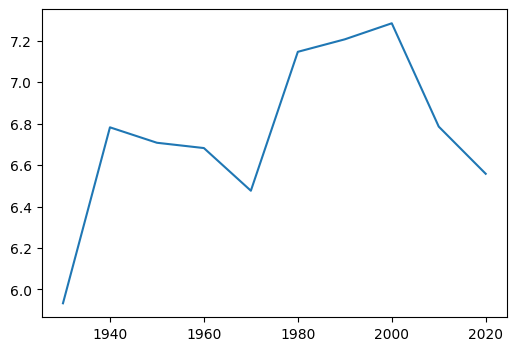

In [5]:
year_avg = df.groupby("decade")["rating"].mean().reset_index()
year_rating_fig, year_rating_ax = plt.subplots(figsize=[6, 4])
year_rating_ax.plot(year_avg["decade"], year_avg["rating"])
plt.show()

To analyze more, we check out what column have what kind of value.

In [6]:
print(df.dtypes)

title           object
year            object
certificate     object
duration       float64
genre           object
rating         float64
description     object
stars           object
votes           object
year_start       int64
decade           int64
dtype: object


Okay, so we can see that we still have a lot of objects, let's see if we can turn them into numerical or categorical values.

In [7]:
df["votes"]

0       177,031
1       199,885
2       501,384
3         9,773
4        15,413
         ...   
9952      3,130
9953    970,067
9954    199,898
9955    439,601
9956      9,786
Name: votes, Length: 9326, dtype: object

We can turn the entire `votes` column to integers.

In [8]:
df["votes_num"] = df["votes"].str.replace(",", "").fillna(0).astype(int)
print(f"{df["votes_num"]}\n")
print(df.dtypes)

0       177031
1       199885
2       501384
3         9773
4        15413
         ...  
9952      3130
9953    970067
9954    199898
9955    439601
9956      9786
Name: votes_num, Length: 9326, dtype: int64

title           object
year            object
certificate     object
duration       float64
genre           object
rating         float64
description     object
stars           object
votes           object
year_start       int64
decade           int64
votes_num        int64
dtype: object


Let's see if popularity and the iMDB rating is correlated.

In [9]:
df[['rating', "votes_num"]].corr()

,rating,votes_num
rating,1.000000,0.142622
votes_num,0.142622,1.000000


So we can roughly say that people will share their opinion even if the movie was great or not. Though we will share our opinion a tiny bit more if the movies was great.

In [10]:
df.sort_values(["rating", "votes"], ascending=[False, False], inplace=True)
df

,title,year,certificate,duration,genre,rating,description,stars,votes,year_start,decade,votes_num
9444,BoJack Horseman,(2014–2020),TV-MA,26.0,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066",2014,2010,16066
17,1899,(2022– ),NaN,60.0,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853,2022,2020,853
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25.0,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221",2005,2000,5221
9578,Stranger Things,(2016– ),TV-14,98.0,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276",2016,2010,36276
8907,Avatar: The Last Airbender,(2005–2008),TV-Y7,24.0,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953",2005,2000,3953
...,...,...,...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,(2014– ),TV-Y,8.0,"Animation, Comedy, Family",NaN,Duggee and the Squirrels bake a pie and learn ...,['Adam Longworth'],NaN,2014,2010,0
9802,Hey Duggee,(2014– ),TV-Y,8.0,"Animation, Comedy, Family",NaN,Duggee arranges for the Squirrels to write to ...,"['Adam Longworth, ', 'Lily-Summer Williams']",NaN,2014,2010,0
9813,Oni: Thunder God's Tale,(2022– ),TV-Y7,NaN,"Animation, Action, Adventure",NaN,Add a Plot,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",NaN,2022,2020,0
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN,2018,2010,0


We can see that movies with very low votes also pops up in our Top 10 chart. We have to solve with Bayesian average forumla.

$$
\begin{aligned}
\text{Bayesian Average} = \frac{C\cdot m + v \cdot R}{C+v} \\
\text{R = average rating of the movie} \\
\text{v = total amount of votes for the movie} \\
\text{m = average rating of all the movies} \\
\text{C = average vote count of all movies}
\end{aligned}
$$

In [11]:
m = df['rating'].mean()
c = df["votes_num"].mean()
print(m)
print(c)
df["bayes_rating"] = ((c * m + df["votes_num"] * df["rating"]) / (c + df["rating"]))

6.764515027322404
18388.55876045464


In [12]:
df.sort_values("bayes_rating", ascending=False, inplace=True)

In [13]:
df = df.drop_duplicates(subset=["title", "year", "rating"])

In [14]:
df.head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes,year_start,decade,votes_num,bayes_rating
9951,Breaking Bad,(2008–2013),TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,359",2008,2000,1831359,952.399403
57,The Lord of the Rings: The Return of the King,(2003),PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...","1,819,157",2003,2000,1819157,896.684332
9921,The Lord of the Rings: The Fellowship of the Ring,(2001),PG-13,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...","1,844,075",2001,2000,1844075,888.836810
78,The Lord of the Rings: The Two Towers,(2002),PG-13,179.0,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...","1,642,708",2002,2000,1642708,792.517028
153,Gladiator,(2000),R,155.0,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...","1,481,531",2000,2000,1481531,691.273717
173,The Departed,(2006),R,151.0,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...","1,310,171",2006,2000,1310171,612.100191
9948,Stranger Things,(2016– ),TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...","1,149,902",2016,2010,1149902,550.545992
161,Léon: The Professional,(1994),R,110.0,"Action, Crime, Drama",8.5,12-year-old Mathilda is reluctantly taken in b...,"['Luc Besson', '| ', ' Stars:', 'Jean Reno,...","1,147,345",1994,1990,1147345,536.869633
96,Titanic,(1997),PG-13,194.0,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...","1,158,746",1997,1990,1158746,504.362454
271,Kill Bill: Vol. 1,(2003),R,111.0,"Action, Crime, Drama",8.2,"After awakening from a four-year coma, a forme...","['Quentin Tarantino', '| ', ' Stars:', 'Uma...","1,103,348",2003,2000,1103348,498.557567


This looks better now. Let's not go further and continue with the book. This was fun.